# Demo for `mastersign.datascience.plot`

In [1]:
import pandas as pd
import numpy as np

Import the `mastersign.datascience.plot` package.

In [2]:
from mastersign.datascience import plot as pl

Create demo data.

In [3]:
data_1 = pd.DataFrame(
    {
        "id": [101, 102, 103, 104, 105],
        "name": ["alpha", "beta", "gamma", "delta", "epsilon"],
        "value": [12, 24, 4, 54, 34],
        "group": ["A", "B", "A", "C", "C"],
    },
    index=[1, 2, 3, 4, 5])

data_2 = pd.DataFrame(
    {
        "t": np.arange(0.0, 100.0, 0.1),
        "group": np.random.choice(['A', 'B', 'C'], 1000, p=[0.5, 0.2, 0.3]),
        "value_a": np.random.normal(size=1000),
        "value_b": np.random.gamma(2, size=1000),
        "value_c": np.random.laplace(size=1000),
        "value_d": np.random.normal(size=1000),
    })
data_3 = pd.DataFrame(
    {
        "t": np.tile(np.arange(0, 10, 0.5), 4),
        "group": np.concatenate([np.repeat(c, 20) for c in ['A', 'B', 'C', 'D']]),
        "subgroup": np.tile(['X', 'Y'], 20 * 2),
        "value": np.random.normal(size=20 * 4),
    })
data_4 = pd.DataFrame(
    {
        "latitude": np.random.normal(size=100) * 0.5 + 53.5,
        "longitude": np.random.normal(size=100) * 1 + 10.0,
        "value_a": np.random.normal(size=100),
        "value_b": np.random.gamma(2, size=100),
    })

## `spec_col_labels()` / `spec_col_file()`

The plotting functions in this package support an automatic conversion from the original column names (index labels on axis 1) in the Pandas DataFrames to human friendly labels.

A map with pairs of column names an labels or an INI file can be used to to configure the labels.

Configure default labels for column names.

In [4]:
column_labels = {
    'count': 'Count',
    'name': 'Name',
    'id': '#',
    'value': 'Value',
    'value_a': 'Value A',
    'value_b': 'Value B',
    'value_c': 'Value C',
    'value_d': 'Value D',
    'group': 'Group',
    'class': 'Class',
}
pl.spec_col_labels(**column_labels)

## `table()`

Display table with all columns and rows including the DataFrame index.

In [5]:
pl.table(data_1)

index,#,Name,Value,Group
1,101,alpha,12,A
2,102,beta,24,B
3,103,gamma,4,A
4,104,delta,54,C
5,105,epsilon,34,C


Display customized table.

In [6]:
pl.table(data_1,
         columns=['name', 'group'],
         labels=['NAME', 'Class'],
         with_index=False,
         limit=3)

NAME,Class
alpha,A
beta,B
gamma,A


## `pie()`

Display the values of one column as a pie chart.

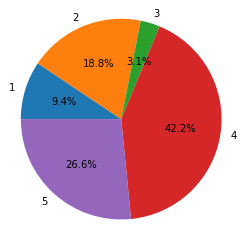

In [7]:
pl.pie(data_1, 'value')

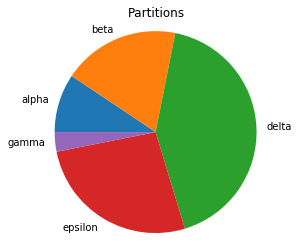

In [8]:
pl.pie(data_1, 'value', label_column='name', sort_by='label',
       title="Partitions", pct=False)

## `pie_groups()`

Display the size of groups in a data set.

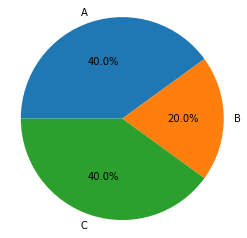

In [9]:
pl.pie_groups(data_1, 'group')

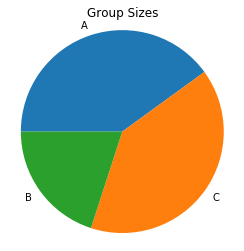

In [10]:
pl.pie_groups(data_1, 'group', sort_by='value',
              title="Group Sizes", pct=False)

## `bar()`

Display a simple bar chart with one columns from a DataFrame, using the index as bar labels.

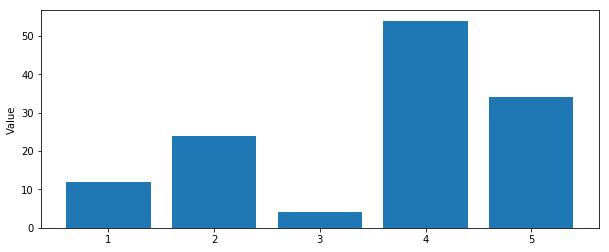

In [11]:
pl.bar(data_1, 'value')

Use another column for the lables and customize axis labels and title.

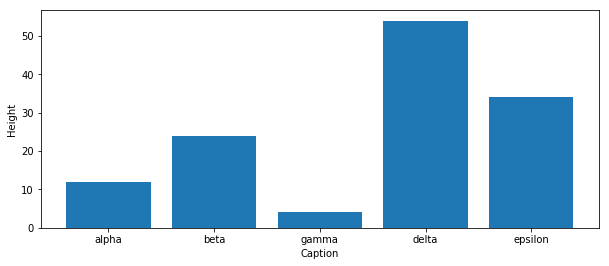

In [12]:
pl.bar(data_1, 'value', 'name', xlabel='Caption', ylabel='Height', title='')

## `lines()`

In [13]:
data_3_A = data_3.groupby('group').get_group('A')

Display a line chart from one column of a DataFrame, using the index for the X axis.

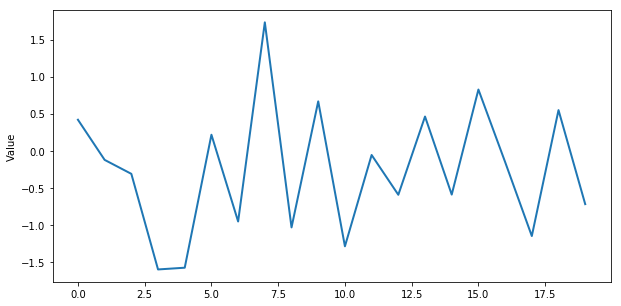

In [14]:
pl.lines(data_3_A, 'value')

Use another column for the X axis.

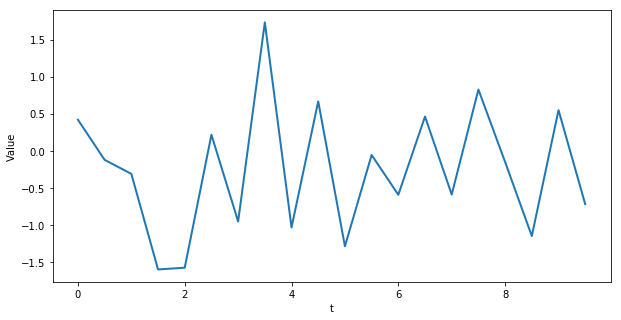

In [15]:
pl.lines(data_3_A, 'value', 't')

Smooth the data with a sliding average.

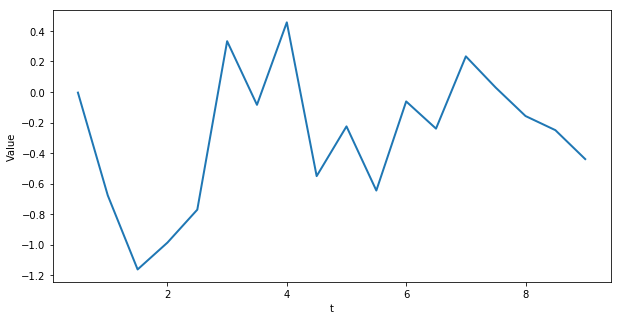

In [16]:
pl.lines(data_3_A, 'value', 't', avg_window=3)

Interpolate the data to display a smooth quadratic or cubic curve.

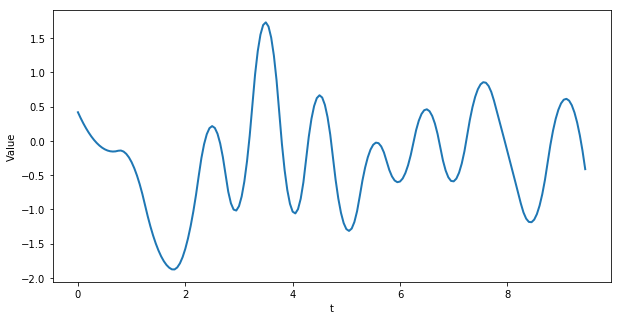

In [17]:
pl.lines(data_3_A, 'value', 't', interpolation_step=0.05)

Show multiple lines from one column, by grouping the values by another column.

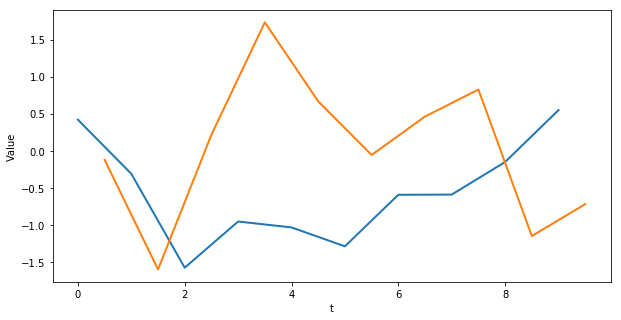

In [18]:
pl.lines(data_3_A, 'value', 't', key_column='subgroup')

Doing the same with labels.

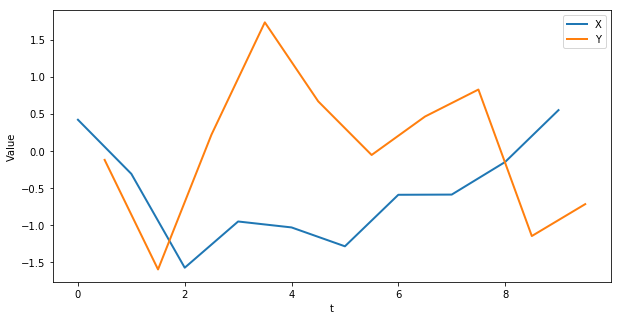

In [19]:
pl.lines(data_3_A, 'value', 't', label_column='subgroup')

Group by two columns, one labelled and one without labels.

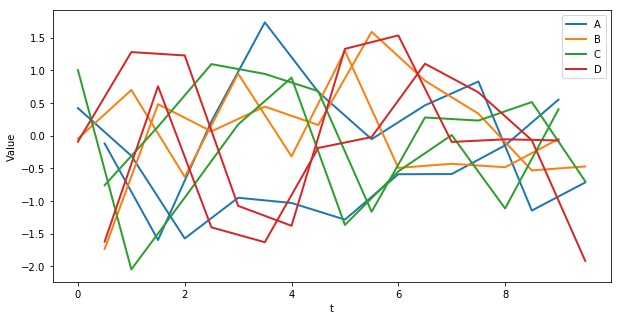

In [20]:
pl.lines(data_3, 'value', 't', label_column='group', key_column='subgroup')

Display values from one column indexed by another column,
grouped by two additional columns, using one of them for the labeling.
Compute a sliding average with a 3-window and apply a cubic interpolation.
And last but not least, specify a custom linewidth, change the label of the X axis, and add a title to the plot.

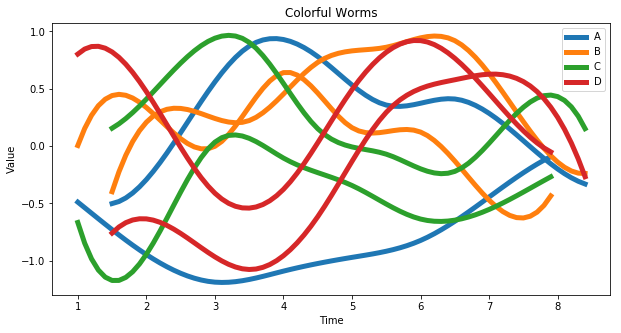

In [21]:
pl.lines(data_3, 'value', 't',
         label_column='group', key_column='subgroup',
         avg_window=3, interpolation_step=0.1, interpolation_kind='cubic',
         linewidth=5, xlabel='Time', title='Colorful Worms')

## `hist()`

Display a histogram of the values from one column.

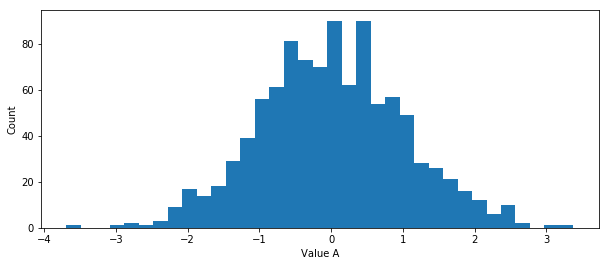

In [22]:
pl.hist(data_2, 'value_a')

Clip the displayed value range and customize bins, ticks, labels, and specify a title.

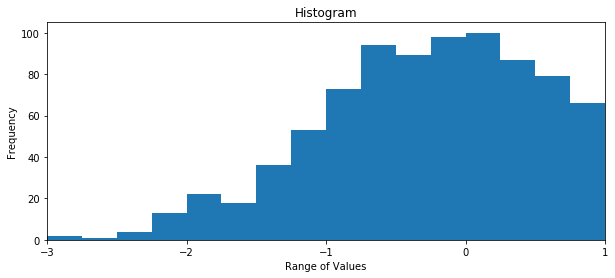

In [23]:
pl.hist(data_2, 'value_a', xmin=-3, xmax=+1,
        bins=np.arange(-3, 1.25, 0.25), ticks=np.arange(-3, 2),
        xlabel='Range of Values', ylabel='Frequency', title='Histogram')

Group the values by another column.

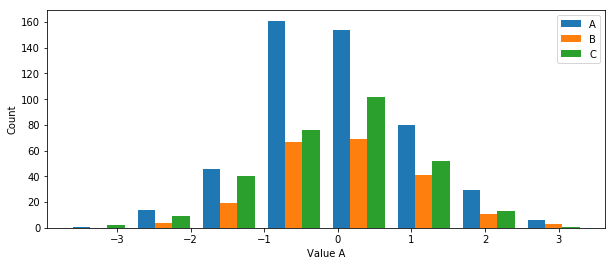

In [24]:
pl.hist(data_2, 'value_a', key_column='group', bins=8)

## `hist2d()`

Display a 2-dimensional histogram from two columns of a DataFrame.

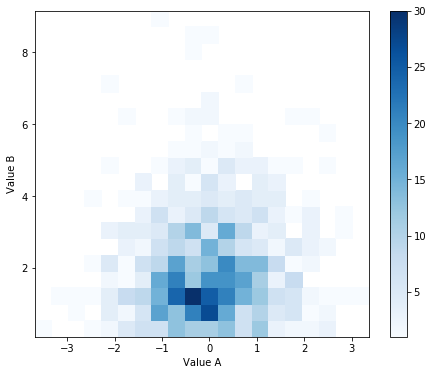

In [25]:
pl.hist2d(data_2, 'value_a', 'value_b')

Clip the X and Y axis, customize the bins, choose another color map, and add a title.

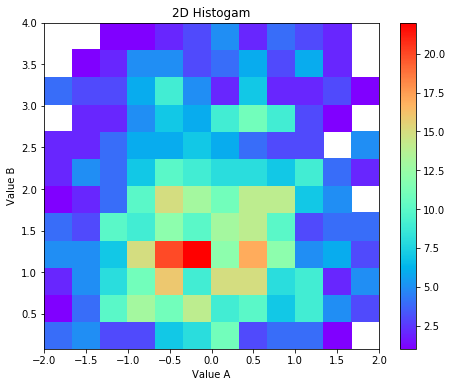

In [26]:
pl.hist2d(data_2, 'value_a', 'value_b',
          xmin=-2, xmax=2, ymax=4, bins=(12, 12),
          cmap='rainbow',
          title='2D Histogam')

## `scatter()`

Display a scatter plot from two columns of a DataFrame.

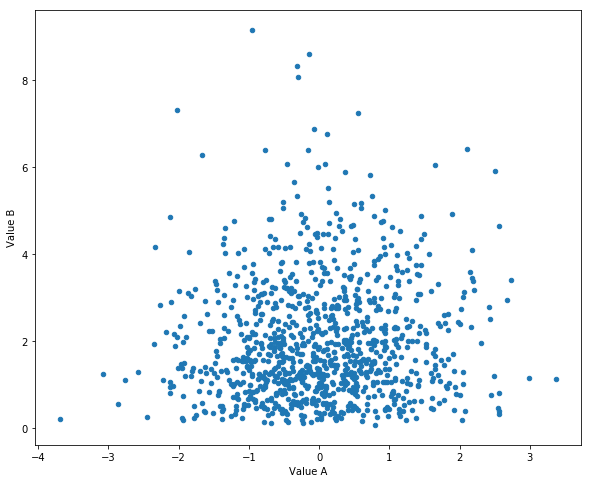

In [27]:
pl.scatter(data_2, 'value_a', 'value_b')

Use two additional columns to specify marker size and color.
Specify overall marker size with factor and clip X and Y axis.

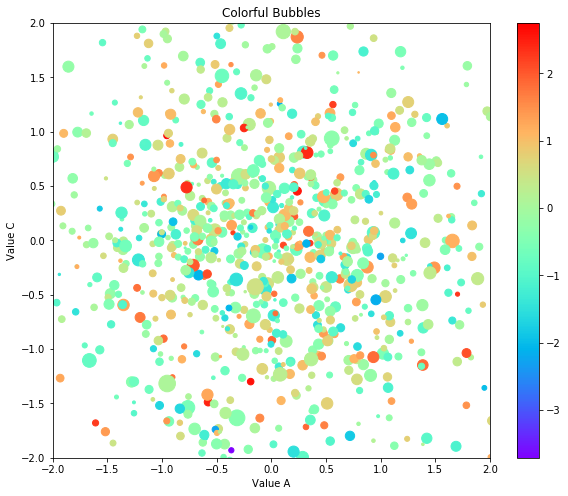

In [28]:
pl.scatter(data_2, 'value_a', 'value_c',
           size_column='value_b', size=30,
           color_column='value_d',
           xmin=-2, xmax=+2, ymin=-2, ymax=+2,
           title='Colorful Bubbles')

## `scatter_map()`

Display a scatter plot from two colums of a DataFrame on a map of the earth.
If not specified the columns `latitude` and `longitude` are used.

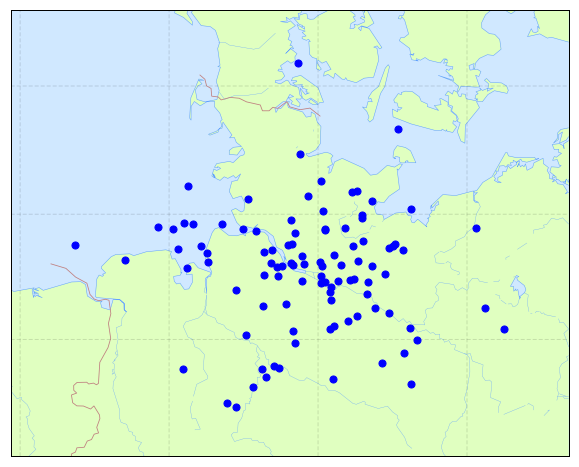

In [29]:
pl.scatter_map(data_4, size=50)

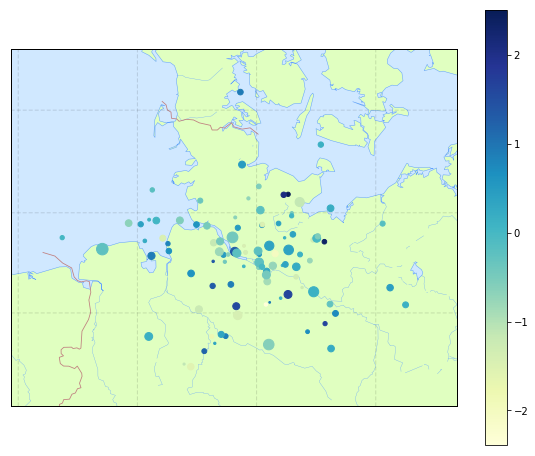

In [30]:
pl.scatter_map(data_4, size_column='value_b', size=20,
               color_column='value_a', figsize=(10, 8))

## `begin()` and `end()`

Draw multiple subplots into a grid.

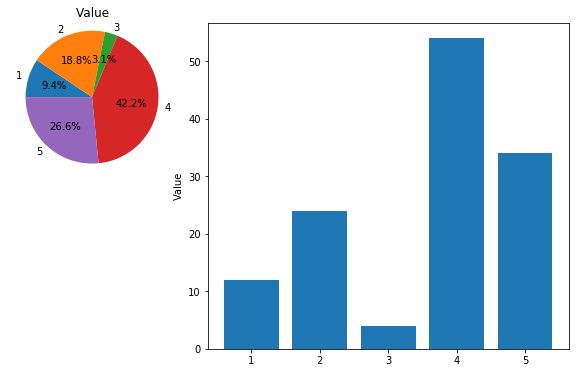

In [31]:
pl.begin(grid=(2, 3), figsize=(10, 6))
pl.pie(data_1, 'value', title='Value')
pl.bar(data_1, 'value', pos=(0, 1), rowspan=2, colspan=2)
pl.end()

## `scatter_matrix()`

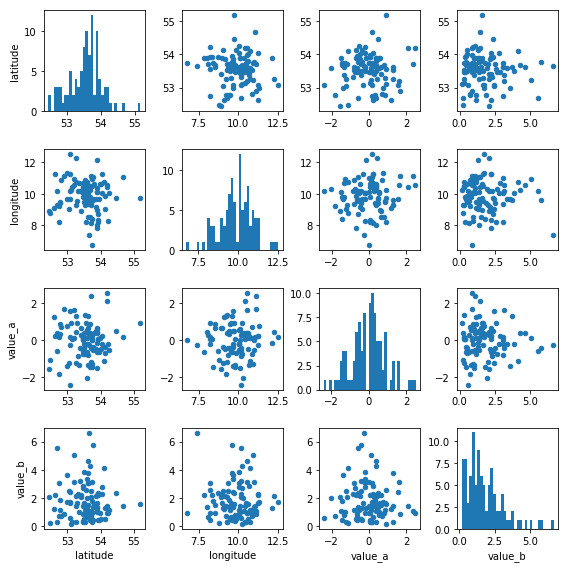

In [32]:
pl.scatter_matrix(data_4)

## `hist2d_matrix()`

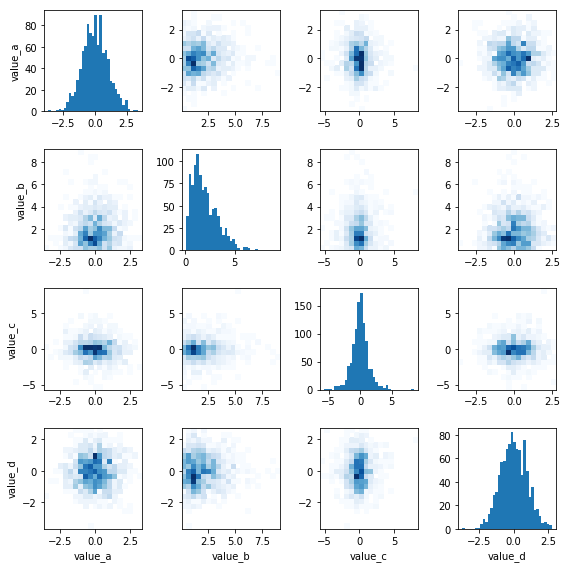

In [33]:
pl.hist2d_matrix(data_2,
                 columns=['value_a', 'value_b', 'value_c', 'value_d'])